<a href="https://colab.research.google.com/github/YashRane123/SummerTrainingML/blob/main/Project/Brain_Tumor_Detection_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install unzip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1319 sha256=417ac3a924ae76be89721e14d9ad7159e4bce68463591e7658169c0b42a6d220
  Stored in directory: /root/.cache/pip/wheels/c5/05/b3/f7b36dbaaf76de31b718cde792c953bfd11d2414a72f204b56
Successfully built unzip


In [22]:
%cd /content/gdrive/MyDrive/Summer_Training_ML/Project_2

/content/gdrive/MyDrive/Summer_Training_ML/Project_2


In [23]:
!ls

brain_tumor_dataset		       custom_trainvalacc.png	yes
Brain_Tumor_Detection_Using_CNN.ipynb  custom_trainvalloss.png
brain_tumor.zip			       no


In [24]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

One Hot Encoding the Target Classes

In [25]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

**Creating 3 Important Lists **

In [26]:

data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/gdrive/MyDrive/Summer_Training_ML/Project_2/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [27]:
paths = []
for r, d, f in os.walk(r"/content/gdrive/MyDrive/Summer_Training_ML/Project_2/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [28]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [29]:
result = np.array(result)
result = result.reshape(139,2)

Splitting the Data into Training & Testing

In [30]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

Model Building

In [31]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))



model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "binary_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      416       
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 64)        8256      
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 64)        16448     
                                                      

In [32]:
from tensorflow.keras import optimizers
opt = optimizers.SGD(learning_rate = 0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [35]:
hist = model.fit(x_train, y_train, epochs = 20, batch_size = 32,verbose=1, validation_data = (x_test, y_test))

Epoch 1/20
4/4 [==============================] - 8s 2s/step - loss: 0.4410 - accuracy: 0.7928 - val_loss: 0.6345 - val_accuracy: 0.7143
Epoch 2/20
4/4 [==============================] - 8s 2s/step - loss: 0.4329 - accuracy: 0.7838 - val_loss: 0.6344 - val_accuracy: 0.7143
Epoch 3/20
4/4 [==============================] - 8s 2s/step - loss: 0.4225 - accuracy: 0.7928 - val_loss: 0.6226 - val_accuracy: 0.6786
Epoch 4/20
4/4 [==============================] - 8s 2s/step - loss: 0.4487 - accuracy: 0.7658 - val_loss: 0.6282 - val_accuracy: 0.6786
Epoch 5/20
4/4 [==============================] - 8s 2s/step - loss: 0.3722 - accuracy: 0.8559 - val_loss: 0.7790 - val_accuracy: 0.6429
Epoch 6/20
4/4 [==============================] - 8s 2s/step - loss: 0.4267 - accuracy: 0.7928 - val_loss: 0.6805 - val_accuracy: 0.6786
Epoch 7/20
4/4 [==============================] - 8s 2s/step - loss: 0.4067 - accuracy: 0.8108 - val_loss: 0.8014 - val_accuracy: 0.6786
Epoch 8/20
4/4 [=========================

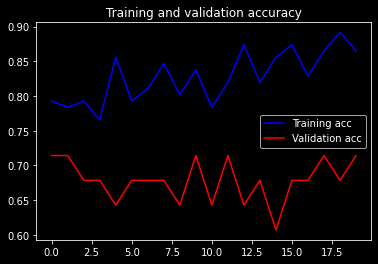

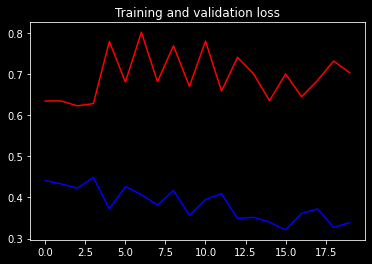

In [43]:
import matplotlib.pyplot as plt 
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('custom_trainvalacc.png')
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')

 
plt.show()



In [44]:
def names(number):
    if number==0:
        return 'Tumor'
    else:
        return ' not a tumor'

93.62390041351318% Confidence This Is No, Its not a tumor


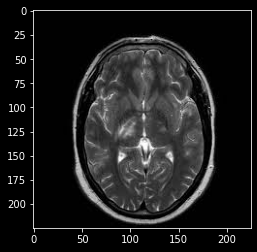

In [50]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/gdrive/MyDrive/Summer_Training_ML/Project_2/no/35 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))